In [16]:
import numpy as np
import pandas as pdort matplotlib.pyplot as plt

In [19]:
# Creating data set

# A
a =[0, 0, 1, 1, 0, 0,
0, 1, 0, 0, 1, 0,
1, 1, 1, 1, 1, 1,
1, 0, 0, 0, 0, 1,
1, 0, 0, 0, 0, 1]
# B
b =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 1, 0,
0, 1, 1, 1, 1, 0]
# C
c =[0, 1, 1, 1, 1, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 0, 0, 0, 0,
0, 1, 1, 1, 1, 0]

# Creating labels
y =[[1, 0, 0],
[0, 1, 0],
[0, 0, 1]]


In [20]:
# activation function

def sigmoid(x):
    return(1/(1 + np.exp(-x)))

# Creating the Feed forward neural network
# 1 Input layer(1, 30)
# 1 hidden layer (1, 5)
# 1 output layer(3, 3)

def f_forward(x, w1, w2):
        # hidden
        z1 = x.dot(w1)# input from layer 1 
        a1 = sigmoid(z1)# out put of layer 2 

        # Output layer
        z2 = a1.dot(w2)# input of out layer
        a2 = sigmoid(z2)# output of out layer
        return(a2)

# initializing the weights randomly
def generate_wt(x, y):
        l =[]
        for i in range(x * y):
            l.append(np.random.randn())
        return(np.array(l).reshape(x, y))

# for loss we will be using mean square error(MSE)
def loss(out, Y):
        s =(np.square(out-Y))
        s = np.sum(s)/len(y)
        return(s)

# Back propagation of error 
def back_prop(x, y, w1, w2, alpha):

        # hidden layer
        z1 = x.dot(w1)# input from layer 1 
        a1 = sigmoid(z1)# output of layer 2 

        # Output layer
        z2 = a1.dot(w2)# input of out layer
        a2 = sigmoid(z2)# output of out layer
        # error in output layer
        d2 =(a2-y)
        d1 = np.multiply((w2.dot((d2.transpose()))).transpose(), 
                                    (np.multiply(a1, 1-a1)))

        # Gradient for w1 and w2
        w1_adj = x.transpose().dot(d1)
        w2_adj = a1.transpose().dot(d2)

        # Updating parameters
        w1 = w1-(alpha*(w1_adj))
        w2 = w2-(alpha*(w2_adj))

        return(w1, w2)

def train(x, Y, w1, w2, alpha = 0.01, epoch = 10):
        acc =[]
        losss =[]
        for j in range(epoch):
            l =[]
            for i in range(len(x)):
                out = f_forward(x[i], w1, w2)
                l.append((loss(out, Y[i])))
                w1, w2 = back_prop(x[i], y[i], w1, w2, alpha)
            print("epochs:", j + 1, "======== acc:", (1-(sum(l)/len(x)))*100) 
            acc.append((1-(sum(l)/len(x)))*100)
            losss.append(sum(l)/len(x))
        return(acc, losss, w1, w2)

def predict(x, w1, w2):
        Out = f_forward(x, w1, w2)
        maxm = 0
        k = 0
        for i in range(len(Out[0])):
            if(maxm<Out[0][i]):
                maxm = Out[0][i]
                k = i
        if(k == 0):
            print("Image is of letter A.")
        elif(k == 1):
            print("Image is of letter B.")
        else:
            print("Image is of letter C.")
        plt.imshow(x.reshape(5, 6))
        plt.show() 




In [21]:
w1 = generate_wt(30, 5)
w2 = generate_wt(5, 3)
print(w1, "\n\n", w2)

[[-9.26055986e-01 -9.99002932e-02 -1.64205353e+00 -4.57172813e-01
  -2.19680550e-01]
 [ 7.99981731e-01  2.78696477e+00  2.19336999e-01 -2.14842656e-02
  -1.35791204e-01]
 [-1.90368418e-01  7.86227756e-02  1.33264285e+00  6.25597414e-01
  -9.32566962e-01]
 [-4.75550883e-01  1.70140653e+00  5.09675164e-01 -1.06616696e+00
  -1.13992434e+00]
 [-1.07355795e+00  8.95098950e-01 -2.10968703e+00 -4.95175692e-02
   5.83541266e-01]
 [ 3.89684971e-01  1.21877883e+00  5.63665193e-02 -3.17145837e-01
  -2.87438570e-01]
 [ 3.49358212e-01 -8.73792732e-01  4.01563129e-01 -6.40472417e-01
   1.29196450e+00]
 [ 1.12328146e+00 -1.76059503e+00 -1.45361912e+00 -4.11625062e-01
   5.82635737e-02]
 [-5.14569812e-01 -1.33154486e+00  9.26814783e-01 -9.77837433e-01
  -8.07807468e-01]
 [-9.01166178e-01 -1.65694503e-01 -6.87736215e-01  1.53318359e+00
  -1.68210576e-01]
 [ 1.31260869e+00  1.53892745e+00 -7.59303280e-01  3.99404111e-01
   3.34384285e-01]
 [-1.15275369e+00 -2.13851584e-01 -3.48038030e+00 -6.26492026e-01

In [22]:
acc, losss, w1, w2 = train(x, y, w1, w2, 0.2, 100)

epochs: 1 ======== acc: 78.65737890847306
epochs: 2 ======== acc: 80.08464616618362
epochs: 3 ======== acc: 81.19294452821944
epochs: 4 ======== acc: 82.09601816189559
epochs: 5 ======== acc: 82.84849569384698
epochs: 6 ======== acc: 83.4896267245928
epochs: 7 ======== acc: 84.0505625201268
epochs: 8 ======== acc: 84.55393781879876
epochs: 9 ======== acc: 85.01513817335062
epochs: 10 ======== acc: 85.44444576872888
epochs: 11 ======== acc: 85.84882388985586
epochs: 12 ======== acc: 86.23309860699214
epochs: 13 ======== acc: 86.60067686432158
epochs: 14 ======== acc: 86.95397808856382
epochs: 15 ======== acc: 87.29470876873681
epochs: 16 ======== acc: 87.62405801258649
epochs: 17 ======== acc: 87.94285341709514
epochs: 18 ======== acc: 88.25169162334193
epochs: 19 ======== acc: 88.55104485390328
epochs: 20 ======== acc: 88.84134075433809
epochs: 21 ======== acc: 89.12301432989388
epochs: 22 ======== acc: 89.39653404886892
epochs: 23 ======== acc: 89.66240674625105
epochs: 24 ======== ac

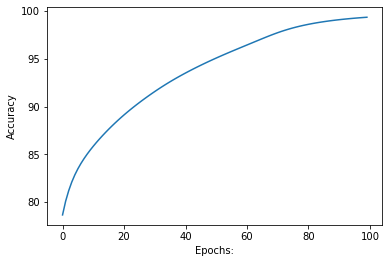

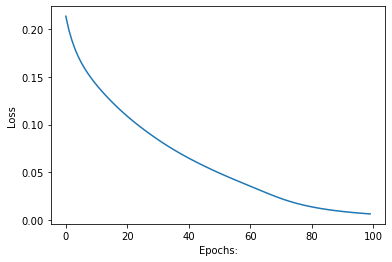

In [24]:
import matplotlib.pyplot as plt1

# plotting accuracy
plt1.plot(acc)
plt1.ylabel('Accuracy')
plt1.xlabel("Epochs:")
plt1.show()

# plotting Loss
plt1.plot(losss)
plt1.ylabel('Loss')
plt1.xlabel("Epochs:")
plt1.show()


Image is of letter B.


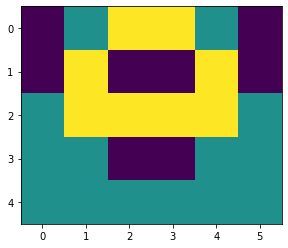

In [27]:

predict(x[0]+x[1], w1, w2)